In [3]:
#import all the packages and install packages
#pip install pyabf
import pyabf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

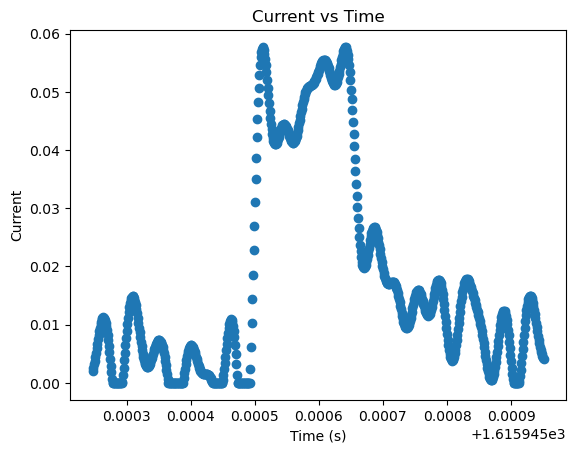

In [4]:
# Load the .mat file
mat_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\event_test_length.mat')
peak_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\pkmax_test_length.mat')
width_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\width_test_length.mat')
area_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\area_test_length.mat')

# Access the data in the .mat file
env_time = ((mat_file["Event"][0][0][0][0][2]).T)[0]
env_current = ((mat_file["Event"][0][0][0][0][1]).T)[0]

# Create a plot
plt.scatter(env_time,env_current)
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.title('Current vs Time')

# Show the plot
plt.show()

In [6]:
#load the label indexes
#F_0 = [5, 6, 12, 15, 17, 24, 26, 27, 36, 39, 43, 44, 45, 48, 51, 54, 59, 64, 68, 70, 74, 75, 76, 79, 3997, 82, 87, 3989, 91, 92, 99, 110, 118, 119, 124, 126, 140, 143, 144, 3988, 3984, 149, 166, 170, 174, 3982, 180, 182, 185, 191, 211, 221, 224, 236, 237, 238, 239, 243, 245, 254, 263, 264, 265, 268, 271, 277, 284, 289, 291, 298, 299, 300, 303, 305, 306, 309, 311, 3979, 317, 318, 323, 341, 343, 346, 349, 356, 358, 3977, 370, 3978, 380, 381, 383, 396, 398, 399, 400, 402, 404, 406, 408, 412, 3975, 419, 420, 426, 428, 431, 3973, 434, 438, 3972, 449, 458, 464, 467, 474, 475, 476, 477, 487, 491, 498, 499, 501, 506, 510, 518, 3965, 527, 534, 535, 537, 545, 546, 552, 553, 555, 559, 565, 575, 577, 583, 584, 585, 587, 591, 592, 599, 606, 607, 610, 615, 617, 623, 633, 635, 638, 639, 644, 646, 647, 648, 653, 655, 657, 662, 665, 675, 683, 686, 694, 702, 709, 710, 711, 716, 729, 3964, 736, 740, 741, 744, 745, 748, 753, 757, 759, 765, 768, 769, 772, 775, 785, 790, 791, 792, 3962, 803, 804, 805, 821, 3956, 833, 837, 845, 846, 847, 849, 851, 860, 862, 869, 877, 880, 882, 886, 888, 891, 893, 894, 903, 904, 905, 906, 908, 909, 916, 928, 931, 932, 935, 939, 942, 943, 955, 956, 962, 971, 973, 976, 986, 996, 999, 1000, 1001, 1005, 1010, 1012, 1015, 1020, 1027, 1029, 1030, 1032, 1033, 1034, 1036, 1038, 1042, 1044, 1046, 1048, 1062, 1064, 1065, 1079, 1080, 1089, 1090, 1093, 1098, 1104, 1109, 1112, 1130, 1139, 1140, 1146, 1147, 1150, 1151, 1159, 1164, 1172, 1175, 1178, 1180, 1182, 1187, 1192, 1198, 1203, 1208, 1218, 1227, 1228, 1231, 1233, 1236, 1243, 1244, 1245, 1252, 1262, 1268, 1269, 1273, 1283, 1290, 1297, 1300, 1302, 1314, 1315, 1317, 1326, 1334, 1343, 1345, 1348, 1358, 1361, 1368, 1370, 1372, 1388, 1390, 1391, 1394, 1396, 1399, 1404, 1406, 1408, 1412, 1414, 1419, 1420, 1430, 1432, 1434, 1435, 1440, 1444, 1445, 1448, 1460, 1465, 1466, 1474, 1482, 1484, 1485, 1486, 1488, 1489, 1492, 1500, 1507, 1512, 1528, 5565, 5564, 5560, 5554, 5547, 5544, 5542, 5538, 5537, 5534, 5530, 5529, 5521, 5504, 5503, 5494, 5483, 5482, 5479, 5477, 5469, 5465, 5464, 5459, 5451, 5449, 5438, 5427, 5426, 5424, 5418, 5394, 5392, 5391, 5387, 5385, 5376, 5372, 5354, 5352, 5351, 5349, 5347, 5344]
#F_10110 = [14, 29, 33, 53, 55, 61, 66, 83, 88, 104, 105, 114, 115, 117, 122, 130, 135, 141, 167, 168, 177, 178, 197, 228, 233, 234, 235, 240, 241, 242, 255, 260, 275, 278, 294, 312, 313, 333, 338, 350, 368, 374, 379, 388, 389, 407, 417, 423, 424, 436, 440, 442, 447, 454, 465, 468, 470, 478, 493, 495, 497, 500, 505, 512, 513, 523, 525, 529, 533, 536, 550, 557, 561, 563, 564, 568, 576, 593, 596, 597, 612, 620, 628, 636, 637, 641, 656, 663, 664, 3998, 685, 693, 703, 713, 720, 738, 743, 747, 754, 755, 773, 783, 798, 806, 807, 808, 813, 820, 826, 827, 834, 842, 870, 884, 887, 889, 890, 901, 902, 907, 917, 918, 921, 922, 941, 945, 951, 953, 958, 963, 969, 972, 984, 992, 1006, 1018, 1026, 1037, 1056, 1063, 1066, 1076, 1083, 1084, 1086, 1088, 1110, 1111, 1116, 1119, 1120, 1123, 1124, 1128, 1129, 1152, 1155, 1165, 1169, 1179, 1183, 1184, 1189, 1190, 1197, 1217, 1223, 1225, 1230, 1232, 1235, 1237, 1248, 1257, 1266, 1278, 1280, 1284, 1285, 1287, 1295, 1298, 1308, 1311, 1321, 1324, 1328, 1331, 1346, 1355, 1359, 1364, 1367, 1369, 1371, 1373, 1374, 1375, 1383, 1386, 1398, 1400, 1401, 1410, 1411, 1418, 1425, 1431, 1442, 1450, 1451, 1456, 1463, 1467, 1468, 1472, 1475, 1477, 1504, 1509, 1513, 1519, 1526, 1527, 1540, 1541, 1560, 1574, 1575, 1576, 1582, 1599, 1603, 1604, 1606, 1631, 1635, 1639, 1642, 1645, 1648, 1653, 1657, 1659, 1663, 1667, 1675, 1693, 1696, 1699, 1708, 1716, 1720, 1722, 1735, 1736, 1746, 1747, 1753, 1772, 1779, 1789, 1790, 1799, 1809, 1816, 1827, 1831, 1836, 1837, 1840, 1841, 1849, 1850, 1855, 1864, 1866, 1871, 1873, 1882, 1885, 1890, 1910, 1912, 1915, 1917, 1919, 1926, 1929, 1933, 1936, 1941, 1942, 1943, 1944, 1958, 1963, 1965, 1966, 1975, 1982, 1986, 1995, 5573, 5571, 5570, 5569, 5568, 5567, 5568, 5569, 5568, 5567, 5558, 5552, 5551, 5539, 5524, 5523, 5519, 5517, 5515, 5509, 5508, 5502, 5498, 5496, 5495, 5490, 5487, 5478, 5472, 5467, 5461, 5456, 5455, 5453, 5450, 5442, 5439, 5437, 5436, 5434, 5432, 5430, 5423, 5421, 5415, 5413, 5410, 5400, 5396, 5388, 5384, 5382, 5377, 5367, 5364, 5362, 5359, 5353, 5350, 5345, 5341, 5340, 5338, 5329, 5319, 5316, 5304, 5299, 5298, 5290, 5287, 5279, 5273, 5268, 5262, 5259, 5251, 5247, 5244, 5232, 5206, 5203, 5201, 5200, 5298, 5192, 5189, 5180, 5179, 5176, 5175, 5173, 5172, 5169, 5167, 5150, 5149, 5147, 5142, 5129, 5128, 5126, 5121, 5116]
#F_110 = [38, 42, 57, 60, 69, 132, 139, 159, 160, 186, 194, 327, 405, 446, 483, 488, 504, 520, 522, 547, 578, 600, 613, 616, 697, 784, 802, 843, 848, 850, 861, 881, 883, 944, 975, 991, 994, 998, 1014, 1049, 1061, 1078, 1102, 1137, 1144, 1149, 1170, 1211, 1229, 1246, 1258, 1271, 1292, 1310, 1319, 1405, 1446, 1469, 1496, 1516, 1532, 1543, 1567, 1572, 1586, 1640, 1691, 1718, 1730, 1733, 1766, 1773, 1787, 1811, 1820, 1838, 1853, 1867, 1908, 1934, 1974, 2109, 2125, 2136, 2148, 2196, 2252, 2263, 2275, 2317, 2322, 2356, 2357, 2373, 2412, 2423, 2480, 2498, 2548, 2576, 2581, 2626, 2683, 2732, 2743, 2765, 2802, 2805, 2818, 2821, 2850, 2851, 2867, 2890, 2895, 2902, 2912, 2939, 2963, 2968, 2985, 3021, 3032, 3036, 3060, 3134, 3150, 3170, 3175, 3204, 3264, 3276, 3292, 3297, 3331, 3373, 3411, 3461, 3477, 3494, 3498, 3520, 3536, 3559, 3570, 3574, 3585, 3604, 3610, 3626, 3691, 3779, 3786, 3799, 3835, 3841, 3843, 3867, 3874, 3882, 3888, 3939, 4004, 4013, 4028, 4087, 4090, 4132, 4172, 4187, 4195, 4207, 4239, 4240, 4247, 4269, 4280, 4284, 4337, 4406, 4499, 4526, 4541, 4579, 4606, 4635, 4659, 4661, 4671, 4713, 4741, 4767, 4834, 4921, 4926, 5011, 5022, 5039, 5066, 5078, 5098, 5131, 5156, 5161, 5184, 5208, 5241, 5274, 5297, 5323, 5355, 5399, 5403, 5460, 5470, 5473, 5486, 5501, 5518, 5536, 5556, 5559, 5562, 5563, 283]
#F_10100 = [129, 181, 195, 199, 209, 280, 364, 481, 619, 630, 645, 814, 1009, 1067, 1077, 1094, 1136, 1177, 1247, 1264, 1288, 1387, 1479, 1481, 1491, 1578, 1632, 1677, 1732, 1792, 1937, 2042, 2155, 2192, 2195, 2281, 2342, 2397, 2432, 2490, 2604, 2612, 2615, 2659, 2706, 2746, 2982, 3080, 3089, 3097, 3109, 3131, 3182, 3239, 3324, 3407, 3478, 3490, 3630, 3698, 3720, 3722, 3735, 4297, 4302, 4315, 4448, 4460, 4532, 4576, 4700, 4711, 4745, 4824, 4888, 4895, 4975, 4992, 5046, 5062, 5084, 5117, 5139, 5171, 5178, 5188, 5339, 5348, 5361, 5368, 5406, 5466, 5546, 5550, 5566, 5577, 5579, 5580, 5516, 1299]
#F_10010 = [282, 451, 456, 466, 486, 737, 778, 915, 924, 980, 1069, 1376, 1499, 1522, 1554, 1600, 1685, 2034, 2104, 2167, 2392, 2393, 2455, 2523, 2569, 2616, 2630, 2716, 2831, 2928, 2941, 3086, 3201, 3266, 3320, 3406, 3569, 3600, 3650, 3753, 3771, 3881, 3950, 4222, 4392, 4446, 4520, 4749, 4766, 4854, 4924, 4925, 4952, 5133, 5185, 5220, 5229, 5317, 5340, 5452, 5493, 5513]
#T_0 = [0, 3, 4, 9, 10, 11, 16, 18, 20, 21, 22, 25, 30, 35, 40, 41, 46, 52, 58, 71, 72, 77, 78, 81, 84, 89, 93, 95, 97, 101, 102, 103, 108, 109, 111, 113, 116, 121, 123, 125, 127, 128, 131, 133, 134, 136, 137, 152, 153, 155, 158, 161, 162, 163, 164, 165, 171, 172, 175, 176, 183, 184, 187, 190, 193, 196, 201, 203, 204, 205, 207, 208, 210, 212, 213, 214, 216, 218, 219, 220, 225, 226, 227, 229, 231, 244, 247, 248, 249, 252, 253, 258, 261, 262, 267, 269, 270, 273, 274, 276, 279, 281, 287, 288, 293, 296, 297, 304, 310, 315, 320, 322, 325, 326, 328, 330, 331, 332, 335, 337, 339, 340, 344, 345, 348, 351, 352, 357, 360, 376, 378, 385, 387, 390, 393, 395, 397, 401, 410, 413, 414, 415, 416, 425, 427, 429, 435, 443, 444, 448, 450, 452, 455, 459, 460, 462, 463, 490, 492, 494, 502, 503, 519, 521, 524, 528, 530, 531, 538, 539, 540, 541, 542, 543, 551, 556, 581, 588, 594, 603, 605, 609, 614, 621, 634, 649, 651, 658, 661, 669, 678, 679, 680, 681, 684, 690, 696, 699, 704, 705, 708, 714, 717, 719, 723, 725, 727, 730, 732, 735, 739, 742, 749, 751, 760, 763, 764, 766, 776, 780, 782, 786, 787, 788, 789, 793, 799, 801, 811, 812, 818, 819, 823, 824, 825, 828, 829, 836, 838, 840, 841, 844, 853, 854, 855, 857, 863, 866, 868, 871, 873, 874, 875, 876, 878, 892, 896, 900, 910, 911, 912, 920, 923, 925, 926, 929, 933, 934, 936, 938, 940, 947, 948, 949, 950, 952, 957, 959, 960, 964, 965, 968, 970, 977, 987, 989, 993, 997, 1004, 1021, 1022, 1023, 1035, 1041, 1047, 1050, 1051, 1052, 1055, 1058, 1060, 1071, 1072, 1075, 1085, 1097, 1101, 1106, 1108, 1117, 1118, 1121, 1126, 1134, 1143, 1153, 1156, 1158, 1160, 1162, 1163, 1166, 1173, 1174, 1191, 1194, 1195, 1196, 1200, 1205, 1206, 1207, 1209, 1212, 1216, 1220, 1221, 1222, 1224, 1238, 1241, 1242, 1253, 1254, 1256, 1259, 1265, 1267, 1270, 1272, 1274, 1275, 1277, 1279, 1281, 1286, 1294, 1303, 1304, 1306, 1318, 1320, 1323, 1325, 1327, 1333, 1335, 1337, 1342, 1344, 1347, 1352, 1353, 1354, 1357, 1363, 1377, 1378, 1392, 1393, 1403, 1413, 1415, 1416, 1417, 1421, 1423, 1426, 1427, 1429, 1437, 1438, 1441, 1447, 1449, 1453, 1454, 1455, 1457, 1470, 1471, 1476, 1478, 1483, 1490, 1494, 1495, 1498, 1501, 1502, 1503, 1505, 1518, 1523, 1531, 5575, 5561, 5555, 5553, 5543, 5541, 5540, 5533, 5531, 5514, 5510, 5507, 5506, 5500, 5499, 5492, 5489, 5488, 5485, 5484, 5481, 5476, 5463, 5458, 5445, 5441, 5435, 5429, 5420, 5414, 5411, 5386, 5381, 5380, 5379, 5378, 5374, 5371, 5365, 5358, 5356, 5342, 5314, 5313, 5292, 5278, 5277, 5275, 5267, 5266, 5250, 5246, 5240, 5239, 5238, 5127]
#T_10110 = [1, 2, 7, 8, 13, 19, 23, 28, 31, 32, 34, 37, 47, 49, 50, 56, 62, 63, 65, 67, 73, 94, 100, 107, 112, 120, 138, 142, 145, 148, 150, 151, 154, 156, 157, 173, 189, 192, 198, 200, 202, 206, 217, 222, 223, 232, 250, 256, 257, 266, 285, 286, 290, 295, 302, 307, 308, 319, 321, 324, 329, 334, 336, 342, 347, 353, 354, 355, 359, 361, 362, 365, 366, 367, 369, 373, 375, 377, 382, 384, 386, 392, 394, 403, 409, 411, 421, 422, 430, 437, 439, 441, 453, 457, 461, 471, 472, 479, 480, 482, 485, 489, 496, 507, 511, 517, 532, 544, 548, 549, 554, 558, 560, 566, 567, 569, 570, 571, 572, 579, 582, 586, 589, 590, 595, 598, 601, 608, 611, 618, 624, 625, 626, 627, 632, 642, 643, 650, 652, 654, 659, 660, 667, 668, 671, 672, 673, 674, 676, 682, 687, 689, 691, 695, 698, 700, 706, 707, 715, 718, 722, 724, 728, 731, 733, 746, 750, 752, 756, 758, 761, 762, 770, 771, 774, 779, 781, 795, 796, 797, 800, 809, 810, 815, 817, 822, 832, 835, 839, 852, 856, 858, 859, 865, 867, 879, 885, 895, 899, 913, 919, 927, 930, 937, 946, 954, 961, 966, 967, 974, 978, 979, 981, 982, 983, 985, 988, 990, 995, 1003, 1008, 1011, 1013, 1016, 1017, 1019, 1024, 1025, 1028, 1031, 1040, 1045, 1053, 1054, 1057, 1059, 1068, 1070, 1073, 1081, 1082, 1091, 1092, 1095, 1096, 1099, 1100, 1103, 1105, 1107, 1113, 1114, 1115, 1125, 1127, 1132, 1133, 1135, 1141, 1145, 1148, 1154, 1157, 1161, 1167, 1168, 1171, 1176, 1181, 1186, 1188, 1193, 1199, 1201, 1202, 1204, 1210, 1213, 1214, 1226, 1234, 1239, 1240, 1250, 1255, 1260, 1261, 1276, 1282, 1289, 1293, 1296, 1301, 1305, 1307, 1309, 1312, 1313, 1316, 1322, 1329, 1330, 1332, 1336, 1338, 1339, 1340, 1341, 1349, 1350, 1351, 1360, 1362, 1365, 1366, 1379, 1380, 1381, 1382, 1384, 1385, 1389, 1395, 1397, 1402, 1407, 1409, 1424, 1433, 1436, 1443, 1452, 1461, 1462, 1473, 1480, 1487, 1493, 1497, 1506, 1510, 1511, 1514, 1515, 1517, 1520, 1521, 1525, 1529, 1530, 1552, 5584, 5583, 5582, 5581, 5578, 5576, 5572, 5557, 5549, 5548, 5545, 5535, 5526, 5525, 5522, 5520, 5512, 5511, 5497, 5491, 5480, 5475, 5474, 5468, 5462, 5457, 5454, 5448, 5447, 5446, 5443, 5440, 5433, 5431, 5428, 5425, 5422, 5419, 5417, 5416, 5412, 5408, 5405, 5404, 5402, 5401, 5398, 5397, 5395, 5393, 5390, 5389, 5383, 5375, 5373, 5370, 5369, 5366, 5363, 5360, 5357, 5346, 5343, 5337, 5335, 5333, 5332, 5331, 5330, 5327, 5326, 5325, 5324, 5318, 5312, 5309, 5308, 5307, 5306, 5305, 5302, 5301, 5296, 5295, 5294, 5293, 5291, 5289, 5285, 5283, 5280, 5276, 5261, 5260, 5254, 5253, 5249, 5248, 5236, 5233, 5225, 5224, 5216, 5213, 5204, 5202, 5197, 5196, 5195, 5194, 5191, 5190, 5181, 5164, 5162, 5158, 5153, 5151, 5148, 5136, 5130]
#T_110 = [85, 86, 96, 98, 106, 169, 188, 215, 230, 246, 251, 272, 301, 316, 371, 391, 469, 473, 484, 514, 573, 602, 604, 622, 640, 688, 701, 712, 721, 726, 767, 816, 864, 872, 897, 898, 1007, 1039, 1074, 1087, 1131, 1185, 1215, 1219, 1249, 1263, 1291, 1356, 1422, 1508, 1524, 1555, 1610, 1701, 1726, 1800, 1895, 1950, 1996, 2082, 2199, 2200, 2256, 2331, 2361, 2439, 2466, 2468, 2500, 2520, 2521, 2667, 2695, 2771, 2792, 2920, 2938, 2962, 3076, 3096, 3149, 3296, 3314, 3352, 3379, 3432, 3488, 3580, 3633, 3793, 3832, 3847, 3873, 4155, 4309, 4402, 4411, 4445, 4491, 4500, 4511, 4544, 4614, 4716, 4723, 4731, 4773, 4793, 4845, 4996, 5045, 5073, 5095, 5118, 5243, 5407, 5471, 5527, 5528, 5532, 5574]
#T_10100 = [259, 292, 508, 509, 515, 516, 562, 574, 580, 692, 777, 914, 1043, 1138, 1142, 1464, 1533, 1668, 1723, 1788, 1803, 1826, 1848, 2044, 2060, 2071, 2346, 2428, 2449, 2694, 2909, 3040, 3216, 3254, 3268, 3317, 3339, 3400, 3416, 3456, 3506, 3519, 3551, 3672, 3676, 3700, 3740, 3794, 3840, 3865, 3908, 3943, 3947, 4119, 4215, 4268, 4296, 4420, 4461, 4485, 4699, 4714, 4904, 4934, 4948, 4948, 5027, 5137, 5140, 5144, 5212, 5505, 5585, 432]
#T_10010 = [629, 631, 666, 670, 831, 1002, 1122, 1251, 1428, 1439, 1458, 1459, 1833, 1900, 2305, 2429, 2541, 2607, 2669, 3017, 3062, 3106, 3179, 3274, 3302, 3389, 3443, 3493, 3546, 3631, 3697, 3775, 3892, 3969, 3986, 3994, 4014, 4055, 4094, 4126, 4139, 4171, 4274, 4398, 4462, 4531, 4582, 4655, 4708, 4726, 4782, 4804, 4830, 4844, 4869, 5006, 5170, 5177, 5221, 5260, 5409, 5444]

In [19]:
#extract the current distribution within dwell time
ratio_list = []
#get the event data, time and current
for i in range(len(mat_file["Event"][0])):
    env_time = ((mat_file["Event"][0][i][0][0][2]).T)[0]
    env_current = ((mat_file["Event"][0][i][0][0][1]).T)[0]

# Define the range of dwell time values to select
    x_min = ((mat_file["Event"][0][i][0][0][3]).T)[0][0]
    x_max = ((mat_file["Event"][0][i][0][0][3]).T)[0][-1]

# Use boolean indexing to select the data points that fall within the range of dwell time values
    dwell_current = []
    dwell_time = ((mat_file["Event"][0][i][0][0][3]).T)[0]
    for a in range(len(env_time)):
        if env_time[a] >= x_min and env_time[a] <= x_max:
            dwell_current.append(env_current[a])

# Divide the dwell time and dwell current axes into sub-parts
    x_bins = np.linspace(x_min, x_max, 5 + 1)
    y_bins = np.linspace(0.015, float(peak_file["PkMax"][i]+0.01), 10 + 1)

# Calculate the number of points within each sub-part
    counts,time_edges,current_edges = np.histogram2d(dwell_time, dwell_current, bins=(x_bins, y_bins))

# Calculate the ratio of points within each sub-part to the total number of points
    ratios = counts / np.sum(counts)
    ratios = ratios.T
    ratio_list.append(ratios)

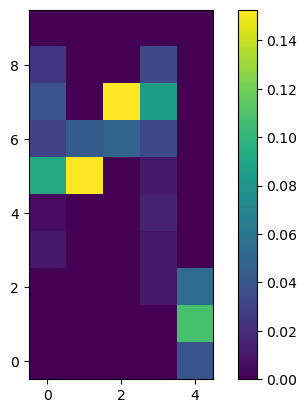

In [20]:
plt.imshow(ratio_list[0], cmap='viridis', origin='lower')
plt.colorbar()
plt.show()

In [21]:
#merge all the time, pkmax and charge information together
pkmax_list = []
charge_list = []
dwell_time_list = []
for i in range(len(peak_file["PkMax"])):
    pkmax_list.append(float(peak_file["PkMax"][i]))
    charge_list.append(float(area_file["Area"][i]))
    dwell_time_list.append(float(width_file["Width"][i]))

In [22]:
#make an empty list for combining all the data lists
combined_pkmax_list = []
combined_charge_list = []
combined_dwell_time_list = []
#combine the ratio lists together
combined_pkmax_list.extend(pkmax_list)
print(len(combined_pkmax_list))
combined_charge_list.extend(charge_list)
print(len(combined_charge_list))
combined_dwell_time_list.extend(dwell_time_list)
print(len(combined_dwell_time_list))

30
30
30


In [23]:
flatten_ratios = []
for ratios in ratio_list:
    flatten_ratios.append(ratios.flatten())
faltten_df = pd.DataFrame(flatten_ratios)
faltten_df[50] = combined_pkmax_list
faltten_df[51] = combined_charge_list
faltten_df[52] = combined_dwell_time_list

In [24]:
faltten_df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.000000,0.0,0.0,0.000000,0.039409,0.000000,0.0,0.0,0.000000,0.108374,...,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057039,8.849170,0.000202
1,0.000000,0.0,0.0,0.000000,0.000000,0.006006,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096831,24.052398,0.000332
2,0.000000,0.0,0.0,0.000000,0.000000,0.001536,0.0,0.0,0.000000,0.000000,...,0.030722,0.059908,0.000000,0.000000,0.000000,0.000000,0.000000,0.065839,37.389114,0.000650
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.074627,0.041045,0.016791,0.024254,0.000000,0.000000,0.022388,0.060194,29.741977,0.000541
4,0.000000,0.0,0.0,0.000000,0.000000,0.011561,0.0,0.0,0.000000,0.034682,...,0.057803,0.000000,0.046243,0.000000,0.000000,0.000000,0.000000,0.054481,8.713574,0.000172
5,0.000000,0.0,0.0,0.000000,0.000000,0.006061,0.0,0.0,0.000000,0.000000,...,0.000000,0.072727,0.000000,0.000000,0.000000,0.000000,0.000000,0.057630,9.551571,0.000164
6,0.000000,0.0,0.0,0.000000,0.012146,0.004049,0.0,0.0,0.000000,0.080972,...,0.048583,0.000000,0.000000,0.000000,0.000000,0.020243,0.000000,0.060897,11.855078,0.000246
7,0.000000,0.0,0.0,0.022857,0.080000,0.005714,0.0,0.0,0.017143,0.062857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063256,7.760064,0.000174
8,0.000000,0.0,0.0,0.000000,0.000000,0.004338,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.023861,0.000000,0.000000,0.000000,0.000000,0.084027,28.359211,0.000460
9,0.000000,0.0,0.0,0.000000,0.042667,0.005333,0.0,0.0,0.016000,0.133333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097517,24.760884,0.000374


In [79]:
#append more information into the ratio list
#this dataframe is using length as a feature, not the difference between labels
flatten_ratios = []
for ratios in extracted_graphs:
    flatten_ratios.append(ratios.flatten())
faltten_df = pd.DataFrame(flatten_ratios)
faltten_df[200] = extracted_pkmax
faltten_df[1601] = extracted_area
faltten_df[1602] = extracted_width
# add the numbers 200 to df
length_list = [5] * 1200 + [10] * 1200
faltten_df[1603] = length_list
faltten_df[1604] = nlength_labels
faltten_df[1605] = length_labels

In [80]:
faltten_df

,0,1,2,3,4,5,6,7,8,9,...,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.056408,10.973353,0.000206,5,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049159,12.691006,0.000280,5,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.044900,11.371079,0.000232,5,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.053049,12.990426,0.000257,5,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049513,13.518292,0.000234,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.084804,25.547766,0.000391,10,10010,110010
2396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.080543,28.356030,0.000466,10,10010,110010
2397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.080485,28.311476,0.000488,10,10010,110010
2398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.066856,26.371008,0.000470,10,10010,110010


In [18]:
#faltten_df.to_pickle("cnn_length_test_v1.pkl")